## Load the python packages

In [1]:
import numpy as np
import netCDF4 as netCDF
import matplotlib.pyplot as plt
import cmocean
from mpl_toolkits.basemap import Basemap
import octant
from matplotlib import path
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

## Load salinity data downloaded from http://cdmo.baruch.sc.edu/dges/ and process in case of nans

In [2]:

# real data salinity

salinity_east_2010_2016 = open('nerss_data/salt_2010_2016_east.txt')

salt_east_2016 = []

for line in salinity_east_2010_2016:
    if line == "\n":
        salt_east_2016.append(np.nan)
    else:
        salt_east_2016.append(line)
        
salt_east_2016 = np.asarray(salt_east_2016)
salt_east_2016 = salt_east_2016.astype('float64')

salt_east_2016 = salt_east_2016[::8]

print salt_east_2016.shape

salinity_west_2010_2016 = open('nerss_data/salt_2010_2016_west.txt')

salt_west_2016 = []

for line in salinity_west_2010_2016:
    if line == "\n":
        salt_west_2016.append(np.nan)
    else:
        salt_west_2016.append(line)
        
salt_west_2016 = np.asarray(salt_west_2016)
salt_west_2016 = salt_west_2016.astype('float64')

salt_west_2016 = salt_west_2016[::8]

print salt_west_2016.shape


#ppt_east_2010_2016 = open('nerss_data/total_ppt_2010_2016.txt')

#ppt_east_2016 = []

aransas_2010_2016 = open('nerss_data/salt_aransas_2010_2016.txt')

aransas_2016 = []

for line in aransas_2010_2016:
    if line == "\n":
        aransas_2016.append(np.nan)
    else:
        aransas_2016.append(line)
        
aransas_2016 = np.asarray(aransas_2016)        
aransas_2016 = aransas_2016.astype('float64')
aransas_2016 = aransas_2016[::8]

(26558,)
(26558,)


## Salinity and temperature from the model

In [3]:
# temp and salt from the surface
temp_model_east = np.load('temp_salt_n/sfc/temp_model_east_sfc.npy')
temp_model_west = np.load('temp_salt_n/sfc/temp_model_west_sfc.npy')

salt_model_east = np.load('temp_salt_n/sfc/salt_model_east_sfc.npy')
salt_model_west = np.load('temp_salt_n/sfc/salt_model_west_sfc.npy')

# temp and salt from the bottom
temp_model_eastf = np.load('temp_salt_n/bt/temp_model_eastf.npy')
temp_model_westf = np.load('temp_salt_n/bt/temp_model_westf.npy')

salt_model_eastf = np.load('temp_salt_n/bt/salt_model_eastf.npy')
salt_model_westf = np.load('temp_salt_n/bt/salt_model_westf.npy')

## Load wind data from another model 

In [4]:
# u and v data (3-hourly data) from ERA
wind = netCDF.Dataset('../frc/fluxes_copano_east_2010_2015_bulk_new_wind_dj2.nc')
uwind = wind['Uwind'][:]
vwind = wind['Vwind'][:]
rain = wind['rain'][:]
print uwind.shape

rain = rain * 86400

# interpolate rain from 3-hourly to 2-hourly data
rainn = pd.DataFrame(rain)
rainn.index = pd.date_range('1/1/2010', periods = 17534, freq='3H')
rain_new = rainn.reindex(pd.date_range('1/1/2010', periods = 26604, freq='2H'))
rain_new = rain_new.interpolate()

ppt = np.asarray(rain_new)

# ppt from mm/day to m3/s

pp = ppt

# area of copano bay
area = 200*10**6 #m2

# from mm/day to m/day
p = pp * 0.001 #(m/day)

# multiply by the area
p = p * area

# Divide by seconds
ppt_new = p / 86400

ppt_new = ppt_new[:,0]

print ppt_new.shape

# interpolate u and v from 3-hourly to 2-hourly data
uu = pd.DataFrame(uwind)
uu.index = pd.date_range('1/1/2010', periods = 17534, freq='3H')
uu_new = uu.reindex(pd.date_range('1/1/2010', periods = 26604, freq='2H'))
uu_new = uu_new.interpolate()

vv = pd.DataFrame(vwind)
vv.index = pd.date_range('1/1/2010', periods = 17534, freq='3H')
vv_new = vv.reindex(pd.date_range('1/1/2010', periods = 26604, freq='2H'))
vv_new = vv_new.interpolate()

u = np.asarray(uu_new)
v = np.asarray(vv_new)

(17534,)
(26604,)


## Load discharge data previously downloaded 

In [5]:
aransas = np.loadtxt('discharge_aransas_2010_2016.txt')
mission = np.loadtxt('discharge_mission_2010_2016.txt')
#data in cubic feet per second

#convert to m-3/s
aransas = aransas * 0.0283168
mission = mission * 0.0283168

# add both discharges to have the total discharge for Copano Bay
total_discharge = aransas + mission

total_discharge = total_discharge[::8]
print total_discharge.shape

(26607,)


In [4]:
dates = pd.date_range('01/01/2010', '12/31/2015 22:00:00 ', freq='2H')
print dates.shape

(26292,)


## Plot the river discharge

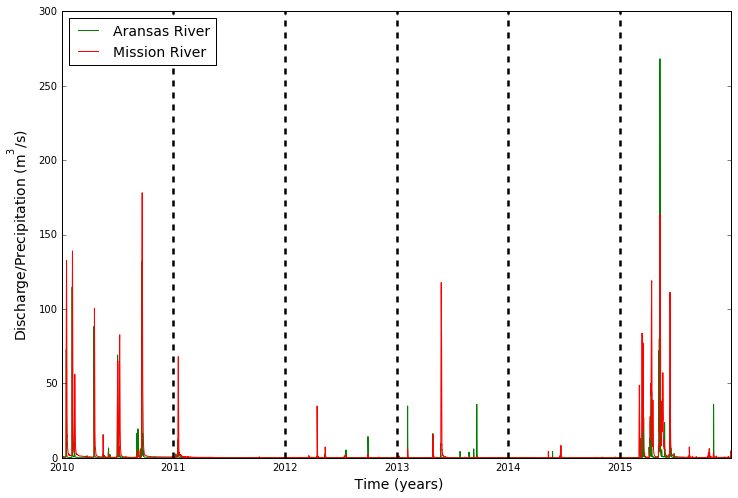

In [47]:
fig = plt.figure(figsize=(12,8))

plt.plot(dates, aransas[0:len(dates)],'g', label = 'Aransas River')
plt.plot(dates, mission[0:len(dates)], 'r', label = 'Mission River')
plt.legend(loc='upper left', shadow=False, fontsize = 14)
plt.ylabel('Discharge/Precipitation (m$^3$/s)', fontsize = 14)
plt.xlabel(' Time (years)', fontsize = 14)
plt.axvline(dates[4380*8], linewidth = 2.5, color='k', linestyle = '--')
plt.axvline(dates[8760*8], linewidth = 2.5, color='k', linestyle = '--')
plt.axvline(dates[13152*8], linewidth = 2.5, color='k', linestyle = '--')
plt.axvline(dates[17532*8], linewidth = 2.5, color='k', linestyle = '--')
plt.axvline(dates[21912*8], linewidth = 2.5, color='k', linestyle = '--')
plt.savefig('/Users/arthur/dissertation/latex/mythesis_2/figures/results/discharge_mission_aransas_2010_2016.pdf',bbox_inches = 'tight')


In [9]:
temp_model_west=temp_model_west[0:360]
temp_model_westf=temp_model_westf[0:360]
salt_model_west=salt_model_west[0:360]
salt_model_westf=salt_model_westf[0:360]
temp_model_east=temp_model_east[0:360]
temp_model_eastf=temp_model_eastf[0:360]
salt_model_east=salt_model_east[0:360]
salt_model_eastf=salt_model_eastf[0:360]


In [55]:
temp_model_east.shape

(26290,)

## Plot of simulated and real data salinity for the surface and bottom, as well as the river discharge for a period of 5 years

377.037402559



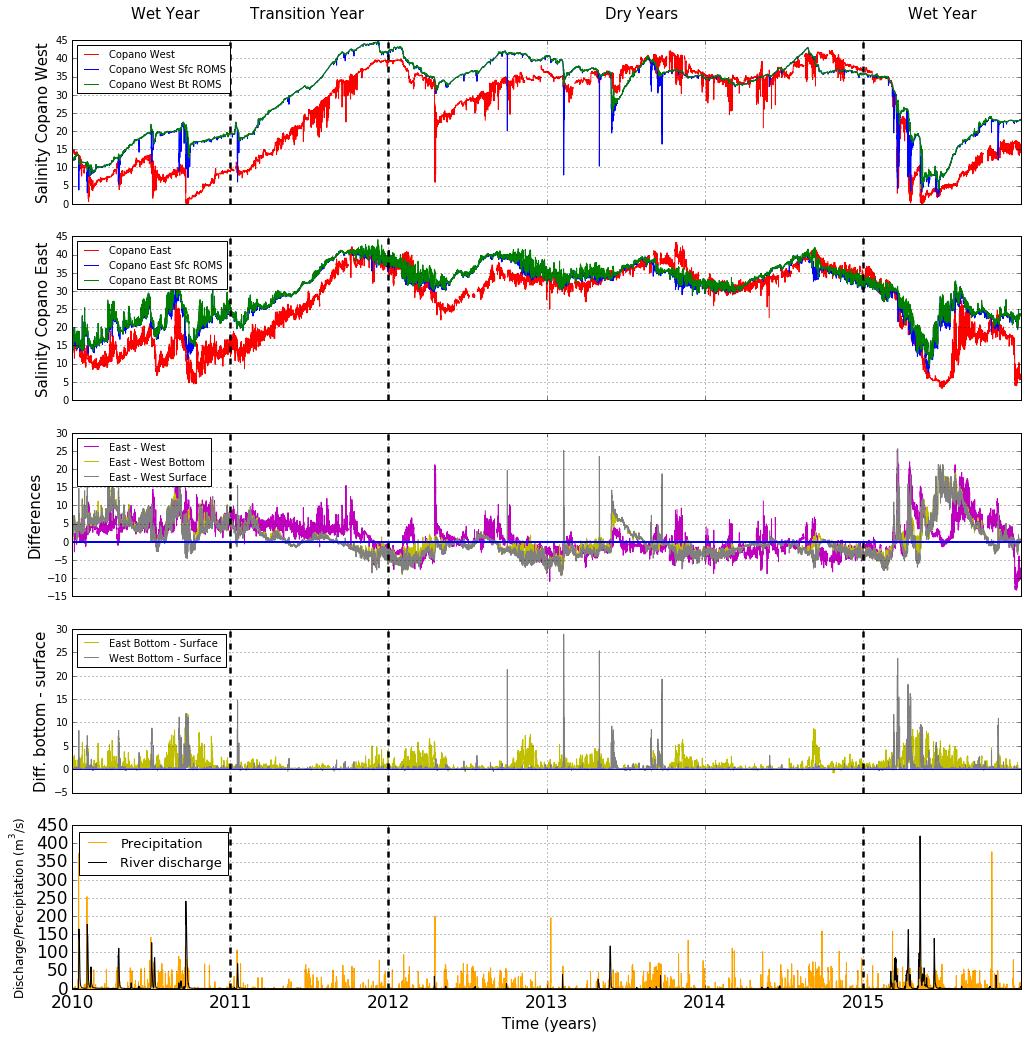

In [17]:
fig = plt.figure(figsize=(17,17))

# plot Copano West Station

ax1 = fig.add_subplot(5,1,1)
ax1.plot(dates[0:len(temp_model_west)], salt_west_2016[0:len(temp_model_west)],'-r', label = 'Copano West')

ax1.plot(dates[0:len(temp_model_west)], salt_model_west, '-b', label = 'Copano West Sfc ROMS')
ax1.plot(dates[0:len(temp_model_west)], salt_model_westf, '-g', label = 'Copano West Bt ROMS')
legend = ax1.legend(loc='upper left', shadow=False, fontsize = 10)
ax1.set_ylabel('Salinity Copano West', fontsize = 15)
ax1.axvline(pd.to_datetime('2011-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax1.axvline(pd.to_datetime('2012-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax1.axvline(pd.to_datetime('2015-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)

ax1.text(pd.to_datetime('2010-05-15 22:00:00'),51,'Wet Year', fontsize = 15)
ax1.text(pd.to_datetime('2011-02-15 22:00:00'),51,'Transition Year', fontsize = 15)
ax1.text(pd.to_datetime('2013-05-15 22:00:00'),51,'Dry Years', fontsize = 15)
ax1.text(pd.to_datetime('2015-04-15 22:00:00'),51,'Wet Year', fontsize = 15)
plt.grid()

# plot Copano East station

ax2 = fig.add_subplot(5,1,2)

ax2.plot(dates[0:len(temp_model_west)], salt_east_2016[0:len(temp_model_west)],'-r', label = 'Copano East')

ax2.plot(dates[0:len(temp_model_west)], salt_model_east, '-b', label = 'Copano East Sfc ROMS')
ax2.plot(dates[0:len(temp_model_west)], salt_model_eastf, '-g', label = 'Copano East Bt ROMS')
legend = ax2.legend(loc='upper left', shadow=False, fontsize = 10)
ax2.set_ylabel('Salinity Copano East', fontsize = 15)
ax2.axvline(pd.to_datetime('2011-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax2.axvline(pd.to_datetime('2012-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax2.axvline(pd.to_datetime('2015-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
plt.grid()

ax3 = fig.add_subplot(5,1,3)

ax3.plot(dates[0:len(temp_model_west)], salt_east_2016[0:len(temp_model_west)] - 
         salt_west_2016[0:len(temp_model_west)],'-m', label = 'East - West')
ax3.plot(dates[0:len(temp_model_west)], salt_model_eastf - salt_model_westf, '-y', label = 'East - West Bottom')
ax3.plot(dates[0:len(temp_model_west)], salt_model_east - salt_model_west, color = 'gray', label = 'East - West Surface')

legend = ax3.legend(loc='upper left', shadow=False, fontsize = 10)
ax3.set_ylabel('Differences', fontsize = 15)
ax3.axvline(pd.to_datetime('2011-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax3.axvline(pd.to_datetime('2012-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax3.axvline(pd.to_datetime('2015-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax3.axhline(0, color = 'b', linewidth = 2.0)
plt.grid()

ax4 = fig.add_subplot(5,1,4)

ax4.plot(dates[0:len(temp_model_west)], salt_model_eastf - salt_model_east, '-y', label = 'East Bottom - Surface')
ax4.plot(dates[0:len(temp_model_west)], salt_model_westf - salt_model_west, color = 'gray', label = 'West Bottom - Surface')
legend = ax4.legend(loc='upper left', shadow=False, fontsize = 10)
ax4.set_ylabel('Diff. bottom - surface', fontsize = 15)
ax4.axvline(pd.to_datetime('2011-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax4.axvline(pd.to_datetime('2012-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax4.axvline(pd.to_datetime('2015-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax4.axhline(0, color = 'b', linewidth = 1.0)
plt.grid()


# plot PPT and discharge in m3/s

ax5 = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(dates[0:len(temp_model_west)], ppt_new[0:len(temp_model_west)],color='orange', label = 'Precipitation')
ax5.plot(dates[0:len(temp_model_west)], total_discharge[0:len(temp_model_west)],'-k', label = 'River discharge')
ax5.set_ylabel('Discharge/Precipitation (m$^3$/s)', fontsize = 12)
legend = ax5.legend(loc='upper left', shadow=False, fontsize = 13)
ax5.axvline(pd.to_datetime('2011-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax5.axvline(pd.to_datetime('2012-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)
ax5.axvline(pd.to_datetime('2015-01-01 00:00:00'), color='k', linestyle='--', lw=2.5)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.xlabel(' Time (years)', fontsize = 15)
plt.grid()
plt.tick_params(labelsize = 17)

plt.savefig('/Users/arthur/dissertation/latex/mythesis_2/figures/results/discharge_salt_ppt_2010_2016_new.png',
            bbox_inches = 'tight')

print max(ppt_new)
print